# What is Dependency Parsing?

##### Dependency Parsing is the process to analyze the grammatical structure in a sentence and find out related words as well as the type of the relationship between them.

Each relationship:

1. Has one head and a dependent that modifies the head.

2. Is labeled according to the nature of the dependency between the head and the dependent. These labels can be found at Universal Dependency Relations.

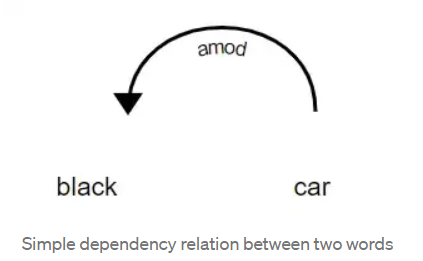

In the above diagram, there exists a relationship between car and black because black modifies the meaning of car. Here, car acts as the head and black is a dependent of the head. The nature of the relationship here is amod which stands for “Adjectival Modifier”. It is an adjective or an adjective phrase that modifies a noun.

# Implementation

There are different ways to implement dependency parsing in Python. In this article, we will look at three ways.

# Method 1: Using spaCy

In [3]:
import spacy
from spacy import displacy

# Load the language model
nlp = spacy.load("en_core_web_sm")

sentence = 'Deemed universities charge huge fees'

# nlp function returns an object with individual token information, 
# linguistic features and relationships
doc = nlp(sentence)

print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

for token in doc:
  # Print the token, dependency nature, head and all dependents of the token
  print ("{:<15} | {:<8} | {:<15} | {:<20}"
         .format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))
  
 # Use displayCy to visualize the dependency 
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
Deemed          | amod     | universities    | []                  
universities    | nsubj    | charge          | [Deemed]            
charge          | ROOT     | charge          | [universities, fees]
huge            | amod     | fees            | []                  
fees            | dobj     | charge          | [huge]              


# Dependency Parser or how to find syntactic neighbours of a word

Semantics is the linguistic and philosophical field that studies meaning and interpretation. It relies a lot on links between words to understand the sentence, and it analyzes the changes in meaning. In programming, semantics is the expected output of a program.


Syntax is the linguistic field of grammar. It is the study of the rules for word patterns in sentences. Known in programming too, errors in syntax often lead to bugs, because rules are often much stricter than in oral language.

# Metrics : how to recognize a good parser ?

An accurate Dependency Parser recognizes the dependencies and relations between words well. Two Metrics (scores) are useful for this:

- Unlabeled Attachment Score (UAS), which corresponds to the number of correctly predicted dependencies over the number of possibilities;

- Labeled Attachment Score (LAS), which corresponds to the number of correctly predicted dependencies and relations over the number of possibilities.

LAS is always less than or equal to UAS, because an incorrect dependency leads to a suboptimal UAS and LAS, while an incorrect relation (or label) only leads to a LAS decreasing.

# Decoders

## Graph-Based Decoders

It is necessary to deal with graph theory to understand these algorithms.

A graph G=(V, A) is a set of vertices V (called also nodes), that represent the tokens, and arcs (i, j)∈ A where i, j ∈ V. The arcs represent the dependencies between two words.

In a Graph-based dependency parser, graphs are directed, which means links have different directions, and there can be multiple arcs between nodes, this is called a multi-digraph.

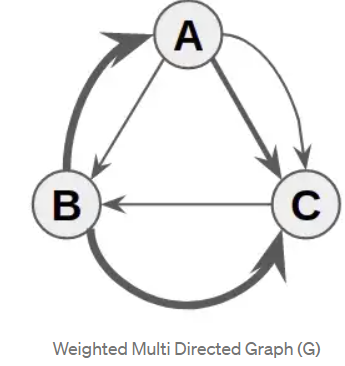

You can note that some arrows are thicker than others. This represents the weight of arcs. The more an arc weighs, the stronger the link between two nodes. We could interpret this as the strength of the syntactic dependency for our parser. For Example, C and A seem to be very dependent on B, but B does not seem very dependent on C and A.

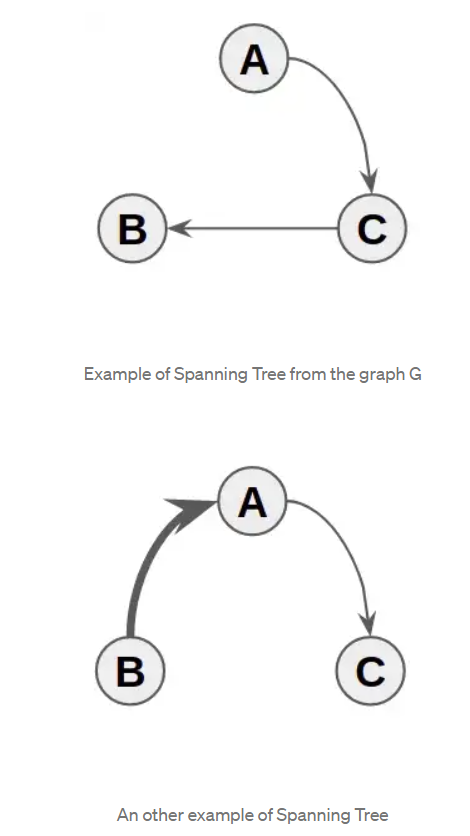

We have 3 nodes here, and we want to keep them. However, we have 6 arcs and we want to keep only 2. The “best” Dependency Tree is the one that has the highest weights: this is called the Maximum Spanning Tree (MST).

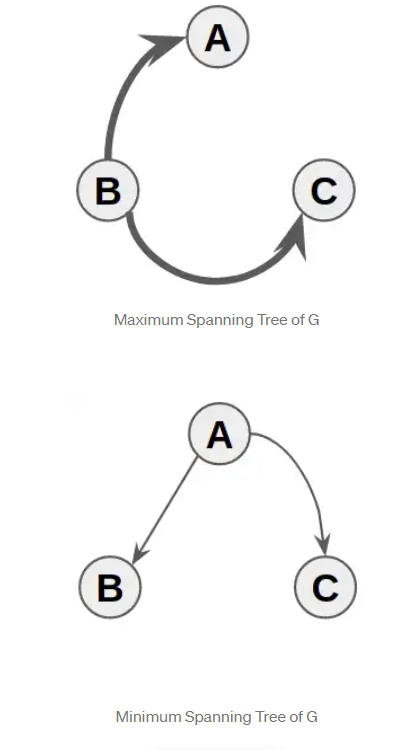

This Maximum Spanning Tree gives us our Dependency Tree, which we will use to find the closest syntactic neighbors in the sentence.

# Conclusion

The insight given here is very light compared to the different existing algorithms. However, this should improve your intuition when developing your Dependency Parser.